# EDA Step 3: 단일 변수 탐색

**목적**: 각 변수의 기본적인 특성을 파악
- 수치형: 히스토그램, boxplot, 평균·중앙값·분포
- 범주형: value_counts, barplot
- 추천시스템 핵심: user/item별 interaction 분포 (Long-tail)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
books = pd.read_csv('../data/books.csv')
users = pd.read_csv('../data/users.csv')
train = pd.read_csv('../data/train_ratings.csv')
test = pd.read_csv('../data/test_ratings.csv')

---
## 3.1 Rating 분포 (Target 변수)

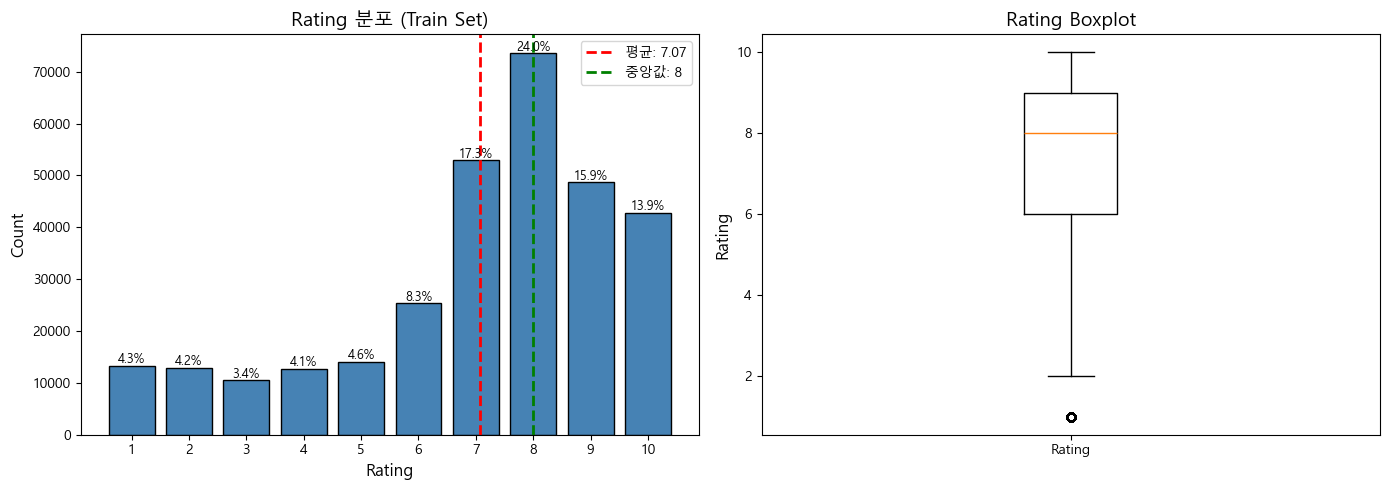


[Rating 통계 요약]
평균: 7.07
중앙값: 8
최빈값: 8
표준편차: 2.43
왜도(Skewness): -0.99


In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
ax1 = axes[0]
rating_counts = train['rating'].value_counts().sort_index()
bars = ax1.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Rating 분포 (Train Set)', fontsize=14)
ax1.set_xticks(range(1, 11))

# 각 막대 위에 비율 표시
total = len(train)
for bar, count in zip(bars, rating_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count/total*100:.1f}%', ha='center', fontsize=9)

# 평균, 중앙값 선
ax1.axvline(train['rating'].mean(), color='red', linestyle='--', linewidth=2, label=f"평균: {train['rating'].mean():.2f}")
ax1.axvline(train['rating'].median(), color='green', linestyle='--', linewidth=2, label=f"중앙값: {train['rating'].median():.0f}")
ax1.legend()

# Boxplot
ax2 = axes[1]
ax2.boxplot(train['rating'], vert=True)
ax2.set_ylabel('Rating', fontsize=12)
ax2.set_title('Rating Boxplot', fontsize=14)
ax2.set_xticklabels(['Rating'])

plt.tight_layout()
plt.show()

# 통계 요약
print("\n[Rating 통계 요약]")
print(f"평균: {train['rating'].mean():.2f}")
print(f"중앙값: {train['rating'].median():.0f}")
print(f"최빈값: {train['rating'].mode()[0]}")
print(f"표준편차: {train['rating'].std():.2f}")
print(f"왜도(Skewness): {train['rating'].skew():.2f}")

---
## 3.2 User당 Rating 수 분포 (User Activity)

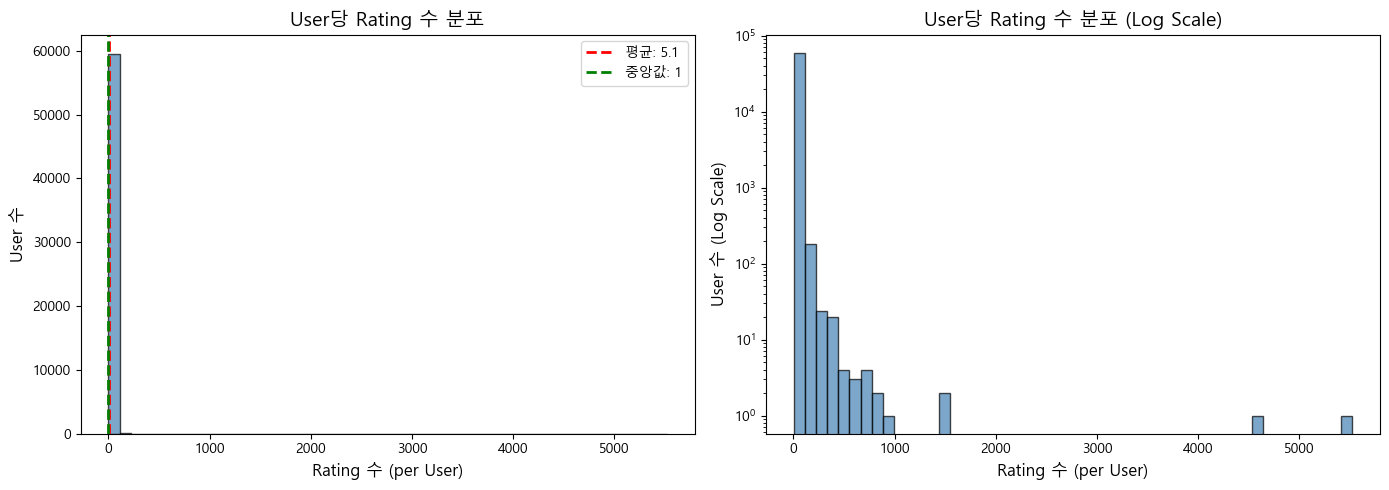


[User당 Rating 수 통계]
평균: 5.13
중앙값: 1
최소: 1
최대: 5520
표준편차: 35.52

[분위수]
25%: 1개
50%: 1개
75%: 3개
90%: 9개
95%: 17개
99%: 66개


In [3]:
user_rating_counts = train.groupby('user_id').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램 (원본)
ax1 = axes[0]
ax1.hist(user_rating_counts, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Rating 수 (per User)', fontsize=12)
ax1.set_ylabel('User 수', fontsize=12)
ax1.set_title('User당 Rating 수 분포', fontsize=14)
ax1.axvline(user_rating_counts.mean(), color='red', linestyle='--', linewidth=2, label=f"평균: {user_rating_counts.mean():.1f}")
ax1.axvline(user_rating_counts.median(), color='green', linestyle='--', linewidth=2, label=f"중앙값: {user_rating_counts.median():.0f}")
ax1.legend()

# 히스토그램 (Log scale)
ax2 = axes[1]
ax2.hist(user_rating_counts, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Rating 수 (per User)', fontsize=12)
ax2.set_ylabel('User 수 (Log Scale)', fontsize=12)
ax2.set_title('User당 Rating 수 분포 (Log Scale)', fontsize=14)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# 통계
print("\n[User당 Rating 수 통계]")
print(f"평균: {user_rating_counts.mean():.2f}")
print(f"중앙값: {user_rating_counts.median():.0f}")
print(f"최소: {user_rating_counts.min()}")
print(f"최대: {user_rating_counts.max()}")
print(f"표준편차: {user_rating_counts.std():.2f}")

# 분위수
print(f"\n[분위수]")
for q in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
    print(f"{int(q*100)}%: {user_rating_counts.quantile(q):.0f}개")


[User Activity 구간별 분포]
        User 수  비율(%)
1        34617  57.89
2         7870  13.16
3         4093   6.84
4-5       4237   7.08
6-10      4092   6.84
11-20     2421   4.05
21-50     1604   2.68
51-100     567   0.95
100+       298   0.50


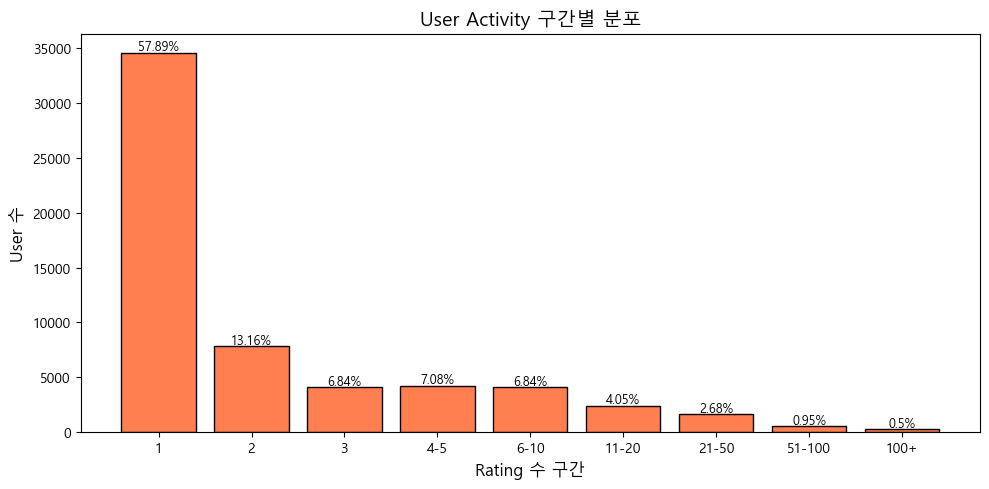

In [4]:
# User Activity 구간별 분포
print("\n[User Activity 구간별 분포]")
bins = [0, 1, 2, 3, 5, 10, 20, 50, 100, 1000]
labels = ['1', '2', '3', '4-5', '6-10', '11-20', '21-50', '51-100', '100+']
user_activity_binned = pd.cut(user_rating_counts, bins=bins, labels=labels, right=True)

activity_dist = user_activity_binned.value_counts().sort_index()
activity_pct = (activity_dist / len(user_rating_counts) * 100).round(2)

activity_df = pd.DataFrame({
    'User 수': activity_dist,
    '비율(%)': activity_pct
})
print(activity_df)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(activity_df.index.astype(str), activity_df['User 수'], color='coral', edgecolor='black')
ax.set_xlabel('Rating 수 구간', fontsize=12)
ax.set_ylabel('User 수', fontsize=12)
ax.set_title('User Activity 구간별 분포', fontsize=14)

for bar, pct in zip(bars, activity_df['비율(%)']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, 
            f'{pct}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 3.3 Item(Book)당 Rating 수 분포 (Item Popularity - Long Tail)

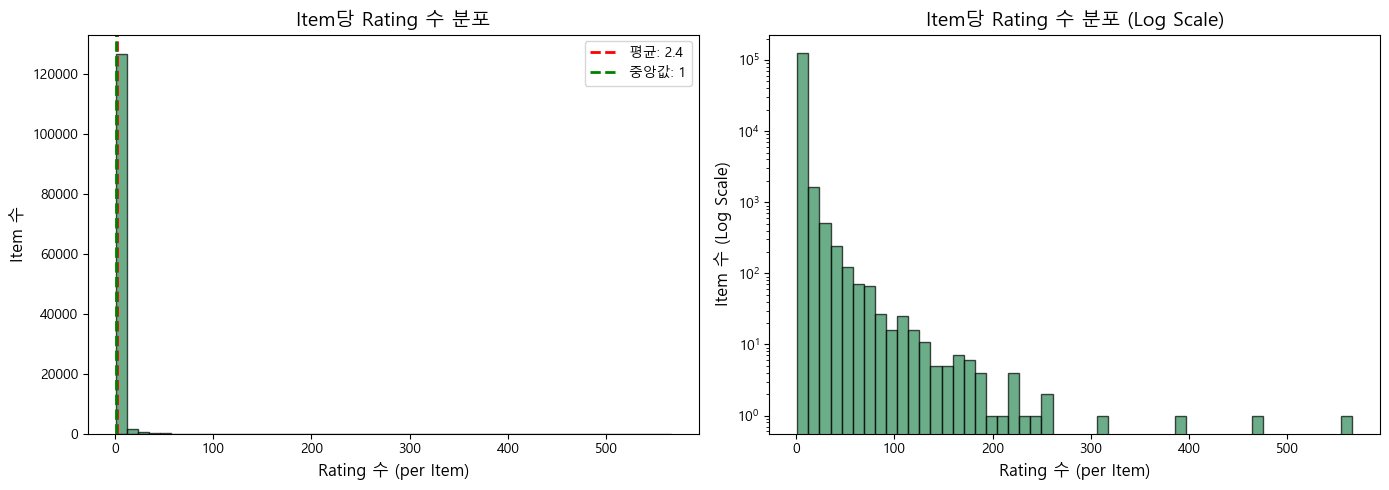


[Item당 Rating 수 통계]
평균: 2.36
중앙값: 1
최소: 1
최대: 566
표준편차: 6.41

[분위수]
25%: 1개
50%: 1개
75%: 2개
90%: 4개
95%: 7개
99%: 22개


In [5]:
item_rating_counts = train.groupby('isbn').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램 (원본)
ax1 = axes[0]
ax1.hist(item_rating_counts, bins=50, color='seagreen', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Rating 수 (per Item)', fontsize=12)
ax1.set_ylabel('Item 수', fontsize=12)
ax1.set_title('Item당 Rating 수 분포', fontsize=14)
ax1.axvline(item_rating_counts.mean(), color='red', linestyle='--', linewidth=2, label=f"평균: {item_rating_counts.mean():.1f}")
ax1.axvline(item_rating_counts.median(), color='green', linestyle='--', linewidth=2, label=f"중앙값: {item_rating_counts.median():.0f}")
ax1.legend()

# 히스토그램 (Log scale)
ax2 = axes[1]
ax2.hist(item_rating_counts, bins=50, color='seagreen', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Rating 수 (per Item)', fontsize=12)
ax2.set_ylabel('Item 수 (Log Scale)', fontsize=12)
ax2.set_title('Item당 Rating 수 분포 (Log Scale)', fontsize=14)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# 통계
print("\n[Item당 Rating 수 통계]")
print(f"평균: {item_rating_counts.mean():.2f}")
print(f"중앙값: {item_rating_counts.median():.0f}")
print(f"최소: {item_rating_counts.min()}")
print(f"최대: {item_rating_counts.max()}")
print(f"표준편차: {item_rating_counts.std():.2f}")

# 분위수
print(f"\n[분위수]")
for q in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
    print(f"{int(q*100)}%: {item_rating_counts.quantile(q):.0f}개")


[Item Popularity 구간별 분포]
        Item 수  비율(%)
1        88392  68.11
2        19080  14.70
3         7547   5.82
4-5       6594   5.08
6-10      4567   3.52
11-20     2196   1.69
21-50     1062   0.82
51-100     243   0.19
100+        96   0.07


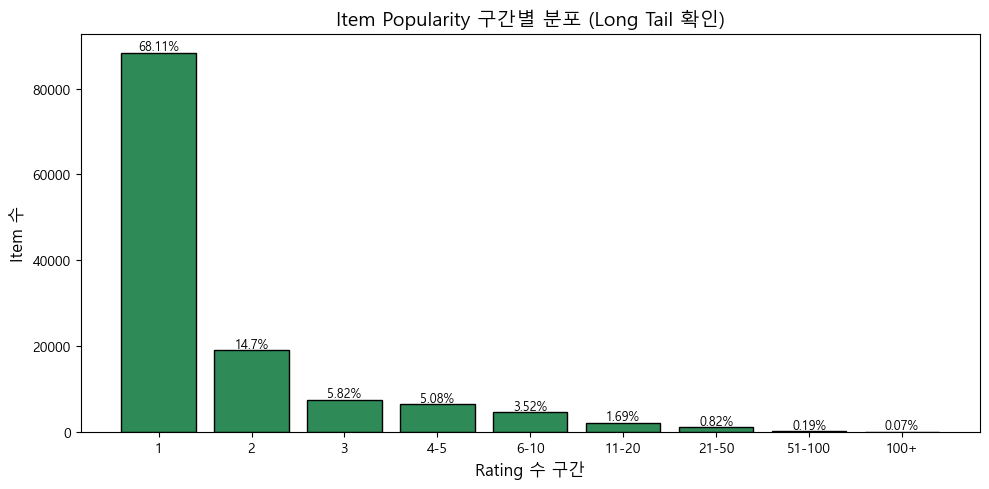

In [6]:
# Item Popularity 구간별 분포
print("\n[Item Popularity 구간별 분포]")
bins = [0, 1, 2, 3, 5, 10, 20, 50, 100, 10000]
labels = ['1', '2', '3', '4-5', '6-10', '11-20', '21-50', '51-100', '100+']
item_pop_binned = pd.cut(item_rating_counts, bins=bins, labels=labels, right=True)

pop_dist = item_pop_binned.value_counts().sort_index()
pop_pct = (pop_dist / len(item_rating_counts) * 100).round(2)

pop_df = pd.DataFrame({
    'Item 수': pop_dist,
    '비율(%)': pop_pct
})
print(pop_df)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(pop_df.index.astype(str), pop_df['Item 수'], color='seagreen', edgecolor='black')
ax.set_xlabel('Rating 수 구간', fontsize=12)
ax.set_ylabel('Item 수', fontsize=12)
ax.set_title('Item Popularity 구간별 분포 (Long Tail 확인)', fontsize=14)

for bar, pct in zip(bars, pop_df['비율(%)']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
            f'{pct}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

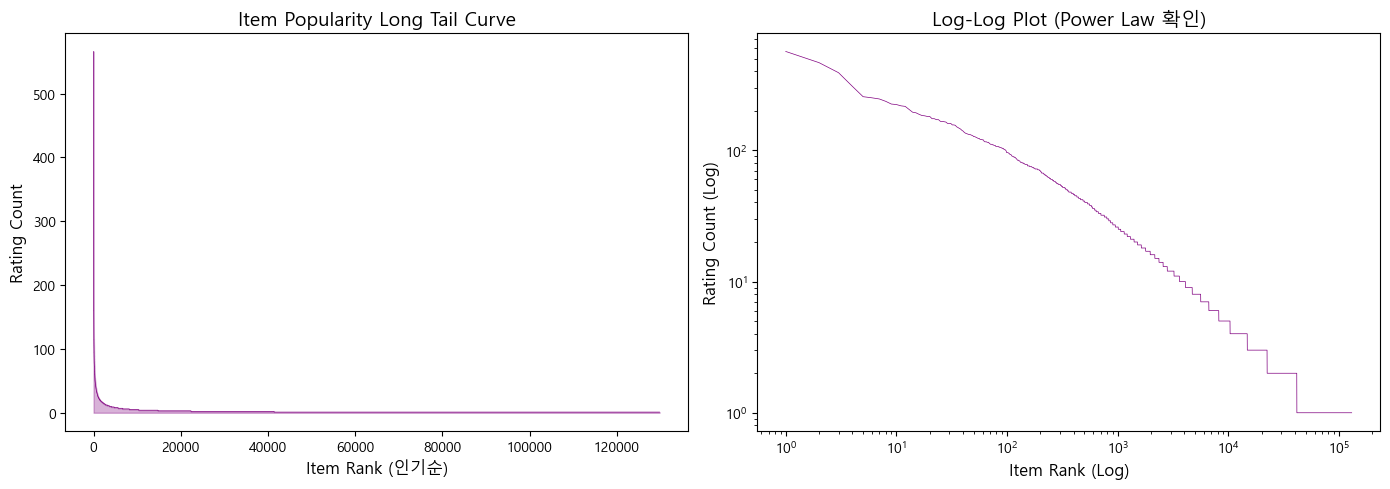


[Long Tail 분석]
상위 20% Item (25,955개)이 차지하는 interaction 비율: 61.1%
Rating이 1개뿐인 Item: 88,392개 (68.1%)


In [7]:
# Long Tail 시각화 (Rank vs Rating Count)
item_sorted = item_rating_counts.sort_values(ascending=False).reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 일반 스케일
ax1 = axes[0]
ax1.plot(range(len(item_sorted)), item_sorted.values, color='purple', linewidth=0.5)
ax1.set_xlabel('Item Rank (인기순)', fontsize=12)
ax1.set_ylabel('Rating Count', fontsize=12)
ax1.set_title('Item Popularity Long Tail Curve', fontsize=14)
ax1.fill_between(range(len(item_sorted)), item_sorted.values, alpha=0.3, color='purple')

# Log-Log 스케일 (Power Law 확인)
ax2 = axes[1]
ax2.plot(range(1, len(item_sorted)+1), item_sorted.values, color='purple', linewidth=0.5)
ax2.set_xlabel('Item Rank (Log)', fontsize=12)
ax2.set_ylabel('Rating Count (Log)', fontsize=12)
ax2.set_title('Log-Log Plot (Power Law 확인)', fontsize=14)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Long Tail 수치 분석
print("\n[Long Tail 분석]")
top_20_pct_items = int(len(item_sorted) * 0.2)
top_20_interactions = item_sorted.iloc[:top_20_pct_items].sum()
total_interactions = item_sorted.sum()

print(f"상위 20% Item ({top_20_pct_items:,}개)이 차지하는 interaction 비율: {top_20_interactions/total_interactions*100:.1f}%")

# 1개 rating만 있는 item
single_rating_items = (item_rating_counts == 1).sum()
print(f"Rating이 1개뿐인 Item: {single_rating_items:,}개 ({single_rating_items/len(item_rating_counts)*100:.1f}%)")

---
## 3.4 Year of Publication 분포

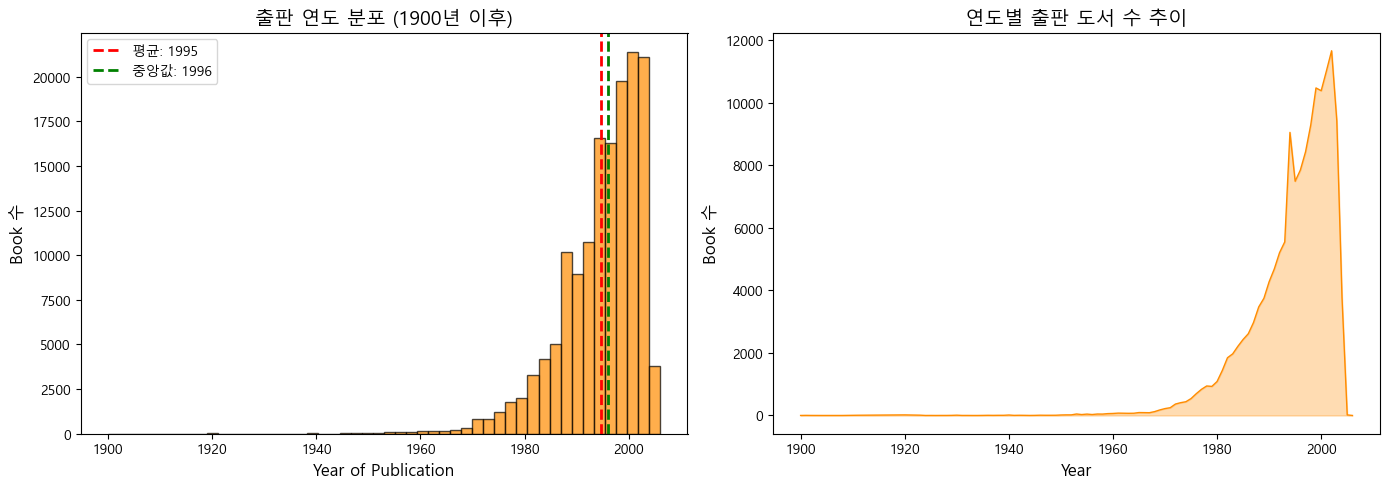


[출판 연도 통계 (1900년 이후)]
평균: 1995
중앙값: 1996
최빈 연도: 2002


In [8]:
# 이상치 제외 (1900년 이후만)
year_valid = books[books['year_of_publication'] >= 1900]['year_of_publication']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
ax1 = axes[0]
ax1.hist(year_valid, bins=50, color='darkorange', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Year of Publication', fontsize=12)
ax1.set_ylabel('Book 수', fontsize=12)
ax1.set_title('출판 연도 분포 (1900년 이후)', fontsize=14)
ax1.axvline(year_valid.mean(), color='red', linestyle='--', linewidth=2, label=f"평균: {year_valid.mean():.0f}")
ax1.axvline(year_valid.median(), color='green', linestyle='--', linewidth=2, label=f"중앙값: {year_valid.median():.0f}")
ax1.legend()

# 연도별 집계
ax2 = axes[1]
year_counts = year_valid.value_counts().sort_index()
ax2.plot(year_counts.index, year_counts.values, color='darkorange', linewidth=1)
ax2.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='darkorange')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Book 수', fontsize=12)
ax2.set_title('연도별 출판 도서 수 추이', fontsize=14)

plt.tight_layout()
plt.show()

print("\n[출판 연도 통계 (1900년 이후)]")
print(f"평균: {year_valid.mean():.0f}")
print(f"중앙값: {year_valid.median():.0f}")
print(f"최빈 연도: {year_valid.mode()[0]:.0f}")

---
## 3.5 User Age 분포

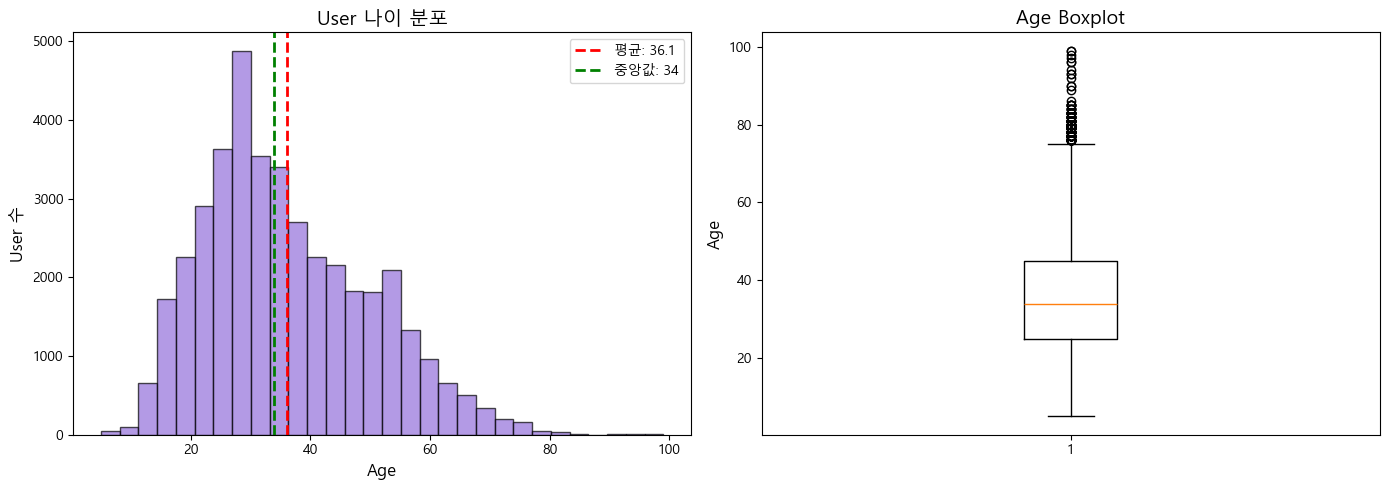


[Age 통계]
평균: 36.1
중앙값: 34
최빈값: 29
결측률: 40.9%


In [9]:
age_valid = users['age'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 히스토그램
ax1 = axes[0]
ax1.hist(age_valid, bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('User 수', fontsize=12)
ax1.set_title('User 나이 분포', fontsize=14)
ax1.axvline(age_valid.mean(), color='red', linestyle='--', linewidth=2, label=f"평균: {age_valid.mean():.1f}")
ax1.axvline(age_valid.median(), color='green', linestyle='--', linewidth=2, label=f"중앙값: {age_valid.median():.0f}")
ax1.legend()

# Boxplot
ax2 = axes[1]
ax2.boxplot(age_valid, vert=True)
ax2.set_ylabel('Age', fontsize=12)
ax2.set_title('Age Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

print("\n[Age 통계]")
print(f"평균: {age_valid.mean():.1f}")
print(f"중앙값: {age_valid.median():.0f}")
print(f"최빈값: {age_valid.mode()[0]:.0f}")
print(f"결측률: {users['age'].isnull().sum()/len(users)*100:.1f}%")

---
## 3.6 Language 분포

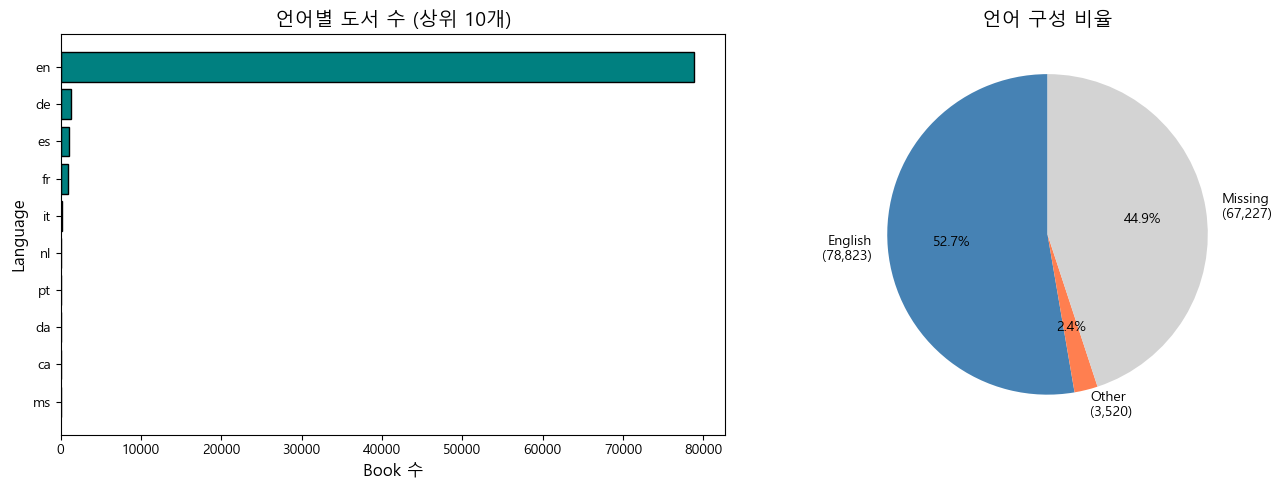


[언어 분포 상세]
전체 도서: 149,570개
영어: 78,823개 (52.7%)
기타 언어: 3,520개 (2.4%)
결측: 67,227개 (44.9%)


In [10]:
lang_counts = books['language'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 상위 10개 언어
ax1 = axes[0]
top_langs = lang_counts.head(10)
bars = ax1.barh(top_langs.index[::-1], top_langs.values[::-1], color='teal', edgecolor='black')
ax1.set_xlabel('Book 수', fontsize=12)
ax1.set_ylabel('Language', fontsize=12)
ax1.set_title('언어별 도서 수 (상위 10개)', fontsize=14)

# 비율 (영어 vs 비영어)
ax2 = axes[1]
en_count = lang_counts.get('en', 0)
non_en_count = lang_counts.sum() - en_count
missing_count = books['language'].isnull().sum()

sizes = [en_count, non_en_count, missing_count]
labels = [f'English\n({en_count:,})', f'Other\n({non_en_count:,})', f'Missing\n({missing_count:,})']
colors = ['steelblue', 'coral', 'lightgray']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('언어 구성 비율', fontsize=14)

plt.tight_layout()
plt.show()

print("\n[언어 분포 상세]")
print(f"전체 도서: {len(books):,}개")
print(f"영어: {en_count:,}개 ({en_count/len(books)*100:.1f}%)")
print(f"기타 언어: {non_en_count:,}개 ({non_en_count/len(books)*100:.1f}%)")
print(f"결측: {missing_count:,}개 ({missing_count/len(books)*100:.1f}%)")

---
## 3.7 Category 분포

In [11]:
# Category 파싱 (문자열 리스트 -> 첫 번째 카테고리 추출)
import ast

def extract_first_category(cat_str):
    """문자열로 된 리스트에서 첫 번째 카테고리 추출"""
    if pd.isna(cat_str):
        return None
    try:
        cat_list = ast.literal_eval(cat_str)
        if isinstance(cat_list, list) and len(cat_list) > 0:
            return cat_list[0]
    except:
        pass
    return cat_str

books['category_main'] = books['category'].apply(extract_first_category)

cat_counts = books['category_main'].value_counts()
print(f"고유 카테고리 수: {len(cat_counts)}")
print(f"\n[상위 20개 카테고리]")
print(cat_counts.head(20))

고유 카테고리 수: 4292

[상위 20개 카테고리]
category_main
Fiction                      32956
Juvenile Fiction              5804
Biography & Autobiography     3320
History                       1925
Religion                      1818
Juvenile Nonfiction           1417
Social Science                1231
Humor                         1161
Body, Mind & Spirit           1109
Business & Economics          1070
Cooking                       1025
Health & Fitness               968
Family & Relationships         959
Computers                      730
Travel                         651
Self-Help                      640
Psychology                     635
Poetry                         626
Science                        624
Art                            562
Name: count, dtype: int64


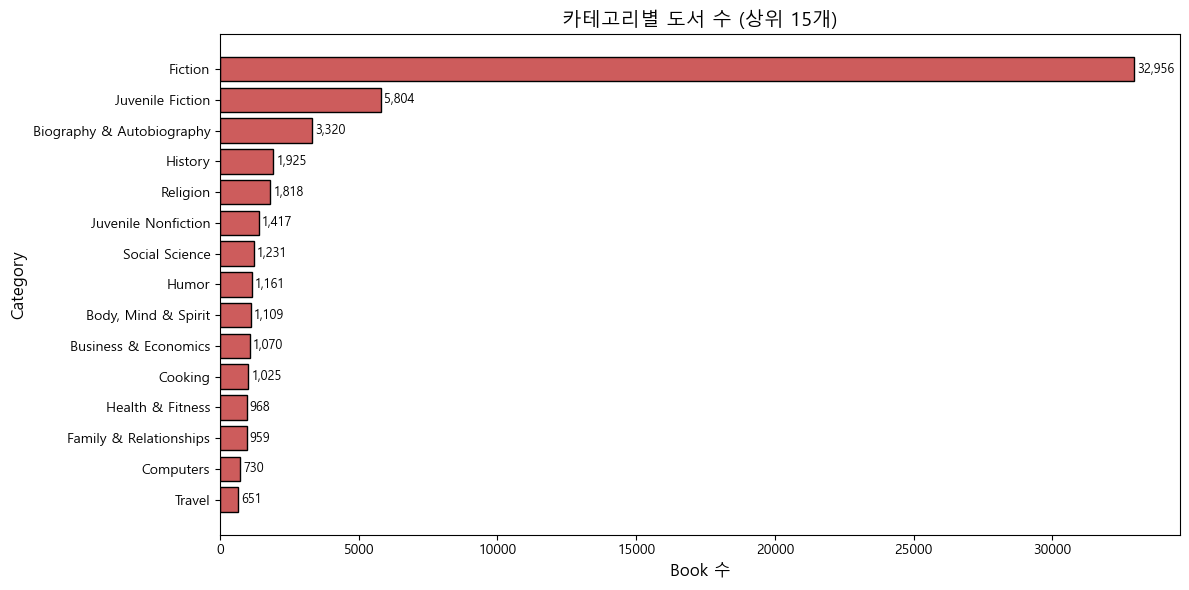

In [12]:
# 상위 15개 카테고리 시각화
fig, ax = plt.subplots(figsize=(12, 6))

top_cats = cat_counts.head(15)
bars = ax.barh(top_cats.index[::-1], top_cats.values[::-1], color='indianred', edgecolor='black')
ax.set_xlabel('Book 수', fontsize=12)
ax.set_ylabel('Category', fontsize=12)
ax.set_title('카테고리별 도서 수 (상위 15개)', fontsize=14)

# 값 표시
for bar in bars:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2, 
            f'{int(width):,}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 3.8 Publisher 분포

고유 Publisher 수: 11,571

[상위 20개 Publisher]
publisher
Harlequin                   3005
Ballantine Books            2322
Pocket                      2274
Penguin Books               1943
Bantam Books                1938
Berkley Publishing Group    1754
Silhouette                  1684
Warner Books                1667
Scholastic                  1586
Simon & Schuster            1578
Signet Book                 1332
Penguin USA                 1315
Harpercollins               1303
Bantam                      1217
Avon                        1185
Fawcett Books               1146
Random House Inc            1098
Vintage Books USA           1095
Tor Books                   1092
St. Martin's Press          1065
Name: count, dtype: int64


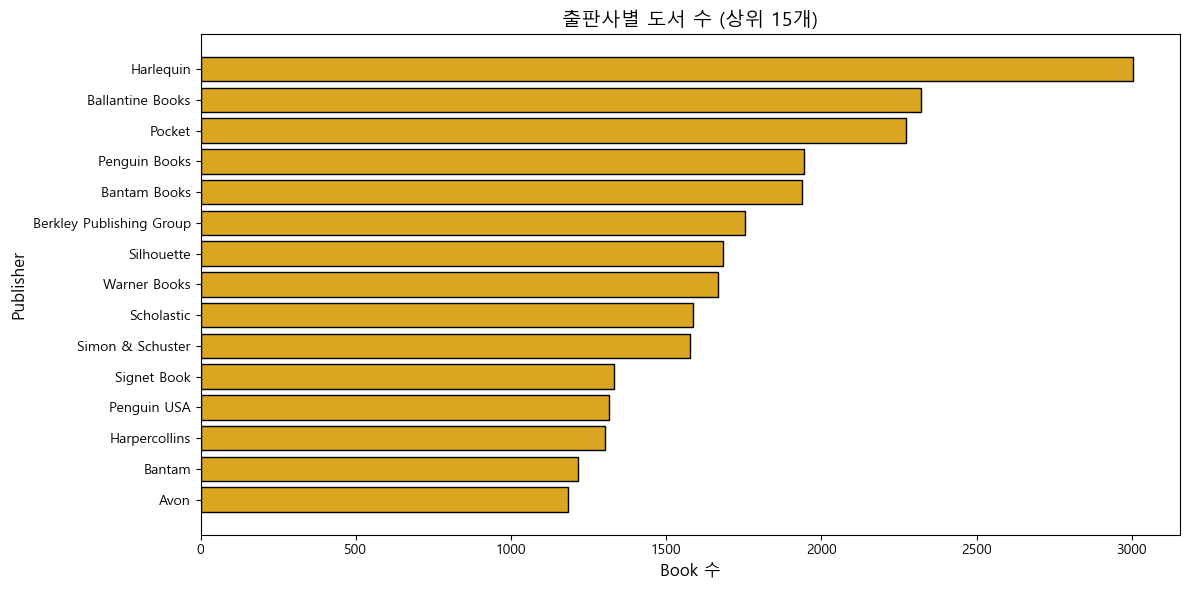

In [13]:
publisher_counts = books['publisher'].value_counts()

print(f"고유 Publisher 수: {len(publisher_counts):,}")
print(f"\n[상위 20개 Publisher]")
print(publisher_counts.head(20))

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

top_pubs = publisher_counts.head(15)
bars = ax.barh(top_pubs.index[::-1], top_pubs.values[::-1], color='goldenrod', edgecolor='black')
ax.set_xlabel('Book 수', fontsize=12)
ax.set_ylabel('Publisher', fontsize=12)
ax.set_title('출판사별 도서 수 (상위 15개)', fontsize=14)

plt.tight_layout()
plt.show()

---
## 3.9 Author 분포

고유 Author 수: 62,058

[상위 20개 Author]
book_author
Stephen King             446
Agatha Christie          404
William Shakespeare      381
Barbara Cartland         283
Nora Roberts             241
Terry Pratchett          198
Isaac Asimov             195
Charles Dickens          187
Carolyn Keene            185
Ann M. Martin            183
Piers Anthony            166
Marion Zimmer Bradley    163
Not Applicable (Na )     163
R. L. Stine              162
Jane Austen              161
Mary Higgins Clark       156
Mark Twain               153
Francine Pascal          152
J. R. R. Tolkien         151
Roald Dahl               150
Name: count, dtype: int64


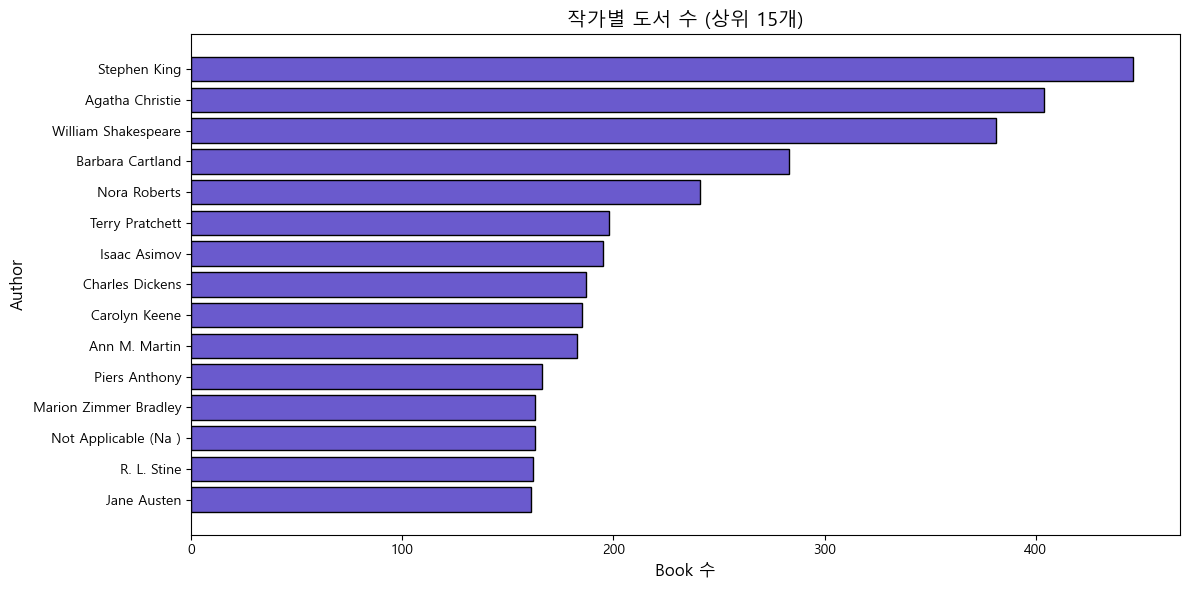


[작가당 도서 수 통계]
평균: 2.41
중앙값: 1
1권만 쓴 작가: 43,029명 (69.3%)


In [14]:
author_counts = books['book_author'].value_counts()

print(f"고유 Author 수: {len(author_counts):,}")
print(f"\n[상위 20개 Author]")
print(author_counts.head(20))

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

top_authors = author_counts.head(15)
bars = ax.barh(top_authors.index[::-1], top_authors.values[::-1], color='slateblue', edgecolor='black')
ax.set_xlabel('Book 수', fontsize=12)
ax.set_ylabel('Author', fontsize=12)
ax.set_title('작가별 도서 수 (상위 15개)', fontsize=14)

plt.tight_layout()
plt.show()

# 작가당 도서 수 분포
print(f"\n[작가당 도서 수 통계]")
print(f"평균: {author_counts.mean():.2f}")
print(f"중앙값: {author_counts.median():.0f}")
print(f"1권만 쓴 작가: {(author_counts == 1).sum():,}명 ({(author_counts == 1).sum()/len(author_counts)*100:.1f}%)")

---
## 3.10 Country 분포 (Location에서 추출)

고유 Country 수: 405

[상위 20개 Country]
country
usa               44135
canada             6239
germany            3528
united kingdom     2956
australia          1801
spain              1661
,                  1474
france              796
italy               773
new zealand         454
switzerland         451
netherlands         404
portugal            327
austria             252
malaysia            170
singapore           129
sweden              120
ireland             109
belgium             104
brazil              103
Name: count, dtype: int64


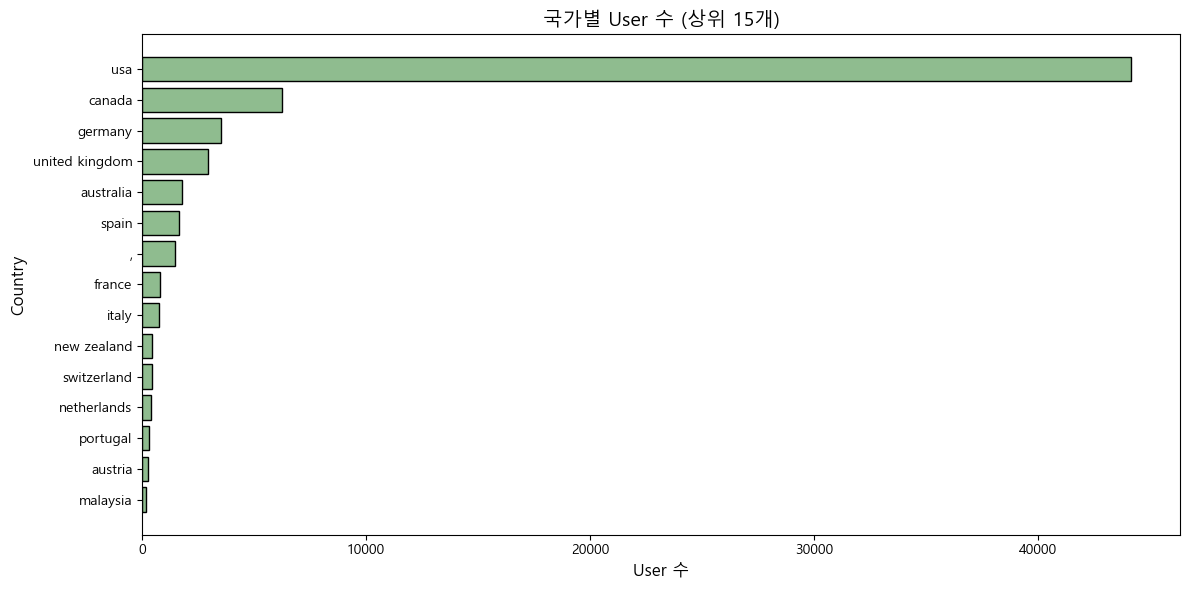

In [15]:
# Location에서 마지막 부분을 country로 추출
users['country'] = users['location'].str.split(', ').str[-1].str.strip().str.lower()

country_counts = users['country'].value_counts()
print(f"고유 Country 수: {len(country_counts)}")
print(f"\n[상위 20개 Country]")
print(country_counts.head(20))

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

top_countries = country_counts.head(15)
bars = ax.barh(top_countries.index[::-1], top_countries.values[::-1], color='darkseagreen', edgecolor='black')
ax.set_xlabel('User 수', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
ax.set_title('국가별 User 수 (상위 15개)', fontsize=14)

plt.tight_layout()
plt.show()

---
## Step 3 요약

**결과를 복사해서 공유해주세요!**

핵심 확인 사항:
1. Rating 분포: 고평점 편향이 얼마나 심한가?
2. User Activity: 대부분의 user가 몇 개의 rating을 남겼는가?
3. Item Popularity: Long Tail이 얼마나 심한가?
4. 주요 카테고리/출판사/작가 분포